In [1]:
%matplotlib inline

import my_hashing
import random
import numpy as np
import gzip
import sketching
import matplotlib.pyplot as plt

genome = sketching.get_data(False, 'reads-aunt_00.fa.gz')

The idea of this approach is to make hash functions more invertiable to allow a frequency sketch over the space 21-mers. In order for this approach to work however the partition has to be large enough so that there are notable differences in the number of different sub words that are found.

This notebook is attempting to give an estimate to how large the partition would have to be. To achieve this I analyse the distribution of kmers for smaller values of k (1-15). In particular we find that 6-mers and lower occur roughly uniformly across the data and so give little to no information when recording their frequency. On the other hand, kmer lengths of 14 and 15 appear to give a much better approximation to what a 21-mer frequency table would look like.

This next piece of code will take a couple of minutes to run. (It should be less than 10 minutes)

In [26]:
# Next we create a bunch of bins each of which will deal with a different partition.
storage = []
for i in range(1, 16):
    storage.append(np.zeros(4**i))

for i in genome:
    for j in range(80):
        for k in range(1, 16):
            kmer = i[j : j + k]
            num = my_hashing.word_to_int(kmer)
            storage[k-1][num] += 1

The graphs below allow you to visualise how much variation the kmer's of a particular length pick up. The y-axis corresponds to how much each a particular kmer has been seen the x-axis is pretty meaningless here.

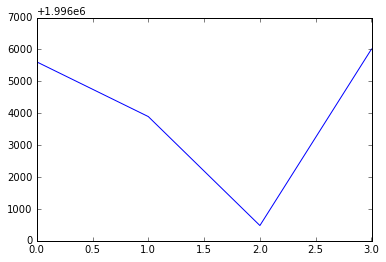

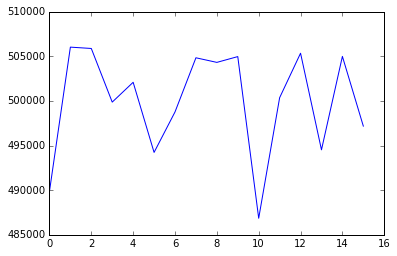

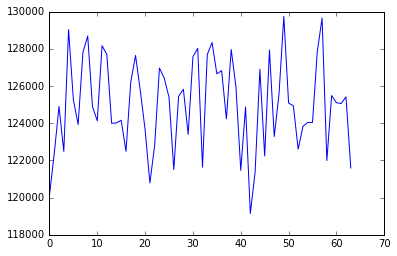

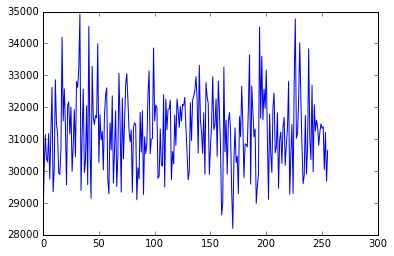

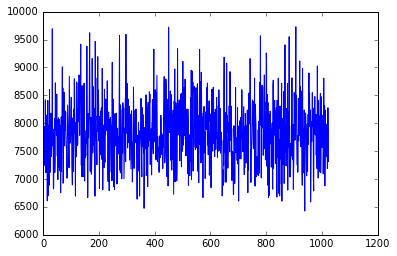

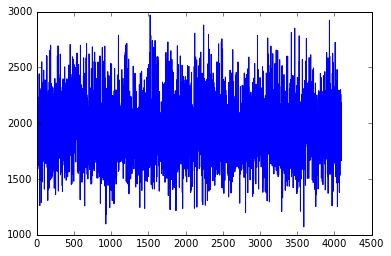

In [32]:
plt.plot(storage[0])
plt.show()
plt.plot(storage[1])
plt.show()
plt.plot(storage[2])
plt.show()
plt.plot(storage[3])
plt.show()
plt.plot(storage[4])
plt.show()
plt.plot(storage[5])
plt.show()

So to describe what these plots are showing, when a partition contains less than  7 characters the amount of intersections means that there is basically no information to be gained by recording them.

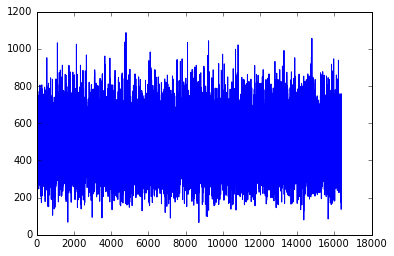

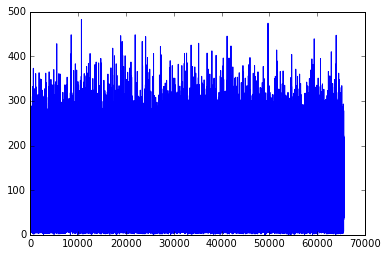

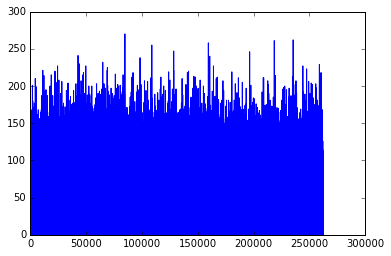

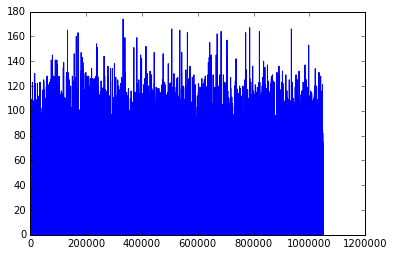

In [30]:
plt.plot(storage[6])
plt.show()
plt.plot(storage[7])
plt.show()
plt.plot(storage[8])
plt.show()
plt.plot(storage[9])
plt.show()

Now the aim of the partition method is to split up the Kmer into smaller parts some of which will hopefully be 0 and so when we can remove these before recombining and hence make a kmer-frequency table with many less than 2^40 computaitions needed. The eventual method recombining sets all values below a predefined error to 0.

In [29]:
for i in range(0, 15):
    print(i+1, 4**(i+1), np.count_nonzero(storage[i]),
          np.count_nonzero(storage[i])/4**(i+1))

1 4 4 1.0
2 16 16 1.0
3 64 64 1.0
4 256 256 1.0
5 1024 1024 1.0
6 4096 4096 1.0
7 16384 16384 1.0
8 65536 65533 0.9999542236328125
9 262144 244919 0.9342918395996094
10 1048576 544865 0.5196237564086914
11 4194304 748169 0.17837738990783691
12 16777216 855898 0.051015496253967285
13 67108864 926007 0.013798579573631287
14 268435456 984236 0.0036665648221969604
15 1073741824 1038809 0.0009674662724137306


The columns refer to K-mer length, number of distinct K-mers, number of K-mers seen and then the percentage of K-mers seen to number of distinct ones.


As can be seen the percentage of nonzero elements begins to reduce once the partition length is 8 and once the partition length gets to 15 the percentage of non-zero elements is 0.097%. In terms of computatition savings this would allow you to formulate the list of non-zero 21-mers with roughly 2^32 calculations. Additionally this only requires in the order of 2^30 bits of memory.

In [23]:
size = len(genome)
N = size*80
print(N)

8000000


As the number of kmers is much bigger than the number of non zero elements, (1038809), you would expect to save similar amounts of space and computaitional power on larger data sets. And so this could be a viable method to implementing a Count-Min approach if you set k to 14 or 15.